# Garanti Validation

## Second Module

Import the Garanti Analytic Metrics module and required libraries

In [2]:
from DatioGaranti.AnalyticMetrics import AnalyticMetrics
from pyspark.sql.functions import col as c

Declare the hash values obtained from the execution of both modules

In [15]:
firstModuleHash = "31282017075f540c304c047a85cce12d172d84934c691c419cf5b83a8144ca884cda119b"
secondModuleHash = "d23d277c9eaa75f1353f6f7dff580fe4584602041e3e7e0cf7985ec5bdd613ec"

Initializes an instance of Analytic Metrics, then loads the testing model

In [16]:
myMetrics = AnalyticMetrics(sqlContext, firstModuleHash, secondModuleHash)
testModel = myMetrics.loadTesting()

Declare a threshold probability and start to compute its metrics.
 - Probability variable must have a value between 0 and 1

In [17]:
probability = .6
myMetrics.computeSummaryRecurrentMetrics(probability, testModel)

Effectiveness    Recall Population Effective population  \
Model                    0.0495976  0.313609       5343                  265   
Recurrent                0.0467678  0.346746       6265                  293   
Model with Recurrent     0.0495976  0.313609       5343                  265   

                        Universe  
Model                 0.00195507  
Recurrent             0.00229244  
Model with Recurrent  0.00195507

Validate metrics of the test model, according to the labels and predictions dataframe

In [6]:
myMetrics.validatingMetrics(testModel)

area
Area under the precision recall curve               0.02493966933408936
Area under the Receiver Operating Characteristi...   0.8154333194835013

Take the threshold of the model, then start to compute its metrics, printing a Confussion Matrix, Precision, Recall and Measure for this

In [7]:
myMetrics.computeStaticMetricsByThreshold(testModel)

/opt/spark/dist/python/pyspark/mllib/evaluation.py:262: UserWarning: Deprecated in 2.0.0. Use accuracy.
  warnings.warn("Deprecated in 2.0.0. Use accuracy.")


threshold  TrueNegatives  FalseNegatives  FalsePositives  TruePositives  \
0        0.0            0.0       2732052.0             0.0          845.0   
1        0.1      2679669.0         52383.0           530.0          315.0   
2        0.2      2721396.0         10656.0           549.0          296.0   
3        0.3      2725468.0          6584.0           551.0          294.0   
4        0.4      2726059.0          5993.0           551.0          294.0   
5        0.5      2726201.0          5851.0           553.0          292.0   
6        0.6      2726974.0          5078.0           580.0          265.0   
7        0.7      2728132.0          3920.0           634.0          211.0   
8        0.8      2729913.0          2139.0           707.0          138.0   
9        0.9      2731438.0           614.0           793.0           52.0   

   PrecisionTrue  PrecisionFalse  RecallTrue  RecallFalse   ScoreF1  
0       0.000309        0.000000    1.000000     0.000000  0.000309  
1       0.005977        0.999802    0.372781     0.980826  0.980638  
2       0.027027        0.999798    0.350296     0.996100  0.995900  
3       0.042745        0.999798    0.347929     0.997590  0.997389  
4       0.046763        0.999798    0.347929     0.997806  0.997605  
5       0.047534        0.999797    0.345562     0.997858  0.997657  
6       0.049598        0.999787    0.313609     0.998141  0.997930  
7       0.051077        0.999768    0.249704     0.998565  0.998334  
8       0.060606        0.999741    0.163314     0.999217  0.998959  
9       0.078078        0.999710    0.061538     0.999775  0.999485

Plot densities by class. The following method handle the following parameters:
- testModel: Prediction model
- limitNegativeClass: Number of observations from the negative class to consider in the plot
- bins: Number of bars in the histogram
- alpha: Alpha blending value (default: 0.65)

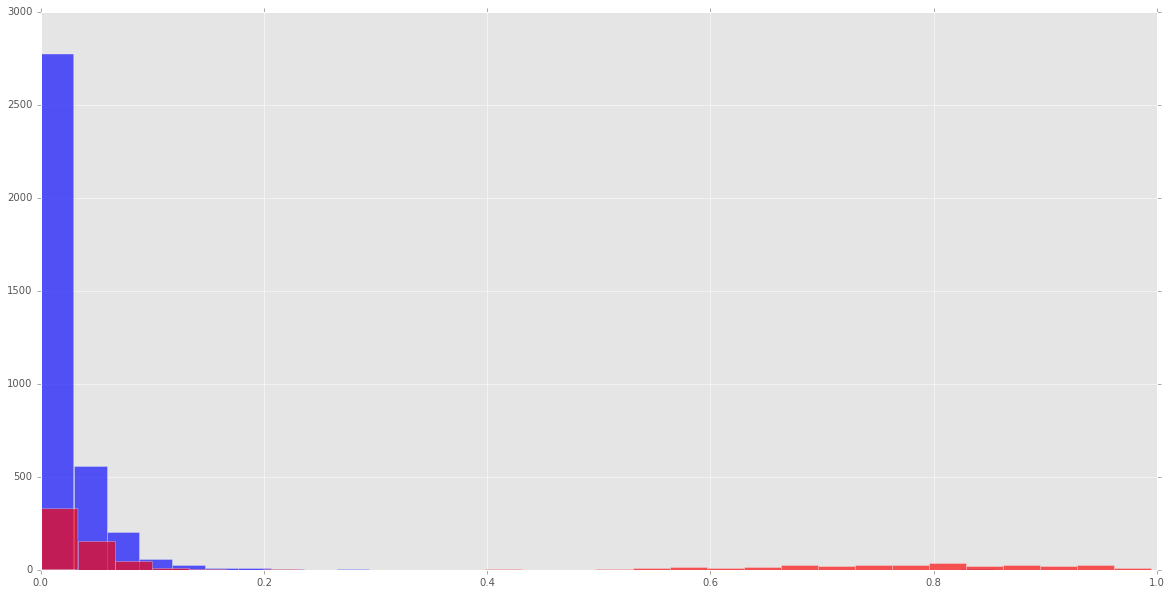

In [8]:
negativeObservations = 3654
bars = 30
myMetrics.plotBinaryTargetsDensitiesHistograms(testModel, negativeObservations, bars)

Show all the cumulative factors. The following method handle the parameters:
- partitionSize: Number of observations by each rank
- testModel: model to analyze

In [9]:
partitionSize = 1000
myMetrics.computeStaticMetricsByRanking(partitionSize, testModel)

rank  effective   sent  aux  total_effective  total_sent  effectiveness  \
0        0       75.0   1004    1             75.0        1004       0.074701   
1        1       49.0   1000    1            124.0        2004       0.061876   
2        2       39.0   1000    1            163.0        3004       0.054261   
3        3       40.0   1000    1            203.0        4004       0.050699   
4        4       47.0   1003    1            250.0        5007       0.049930   
5        5       36.0   1001    1            286.0        6008       0.047603   
6        6        8.0   1005    1            294.0        7013       0.041922   
7        7        0.0   1000    1            294.0        8013       0.036690   
8        8        0.0   1000    1            294.0        9013       0.032620   
9        9        0.0   1000    1            294.0       10013       0.029362   
10      10        3.0   1000    1            297.0       11013       0.026968   
11      11        1.0   1000    1            298.0       12013       0.024806   
12      12        0.0   1000    1            298.0       13013       0.022900   
13      13        0.0   1000    1            298.0       14013       0.021266   
14      14        0.0   1001    1            298.0       15014       0.019848   
15      15        0.0   1000    1            298.0       16014       0.018609   
16      16        1.0   1000    1            299.0       17014       0.017574   
17      17        1.0   1000    1            300.0       18014       0.016654   
18      18        0.0   1000    1            300.0       19014       0.015778   
19      19        0.0   1000    1            300.0       20014       0.014990   
20      20        1.0   1000    1            301.0       21014       0.014324   
21      21        0.0   1000    1            301.0       22014       0.013673   
22      22        1.0   1000    1            302.0       23014       0.013122   
23      23        0.0   1000    1            302.0       24014       0.012576   
24      24        2.0   1000    1            304.0       25014       0.012153   
25      25        0.0   1000    1            304.0       26014       0.011686   
26      26        1.0   1000    1            305.0       27014       0.011290   
27      27        0.0   1000    1            305.0       28014       0.010887   
28      28        1.0   1000    1            306.0       29014       0.010547   
29      29        0.0   1001    1            306.0       30015       0.010195   
...    ...        ...    ...  ...              ...         ...            ...   
2267  2267        0.0   4539    1            840.0     2539928       0.000331   
2268  2268        0.0   5305    1            840.0     2545233       0.000330   
2269  2269        0.0   3398    1            840.0     2548631       0.000330   
2270  2270        0.0   9100    1            840.0     2557731       0.000328   
2271  2271        0.0   3917    1            840.0     2561648       0.000328   
2272  2272        0.0   4419    1            840.0     2566067       0.000327   
2273  2273        0.0   3871    1            840.0     2569938       0.000327   
2274  2274        2.0  10703    1            842.0     2580641       0.000326   
2275  2275        1.0   5129    1            843.0     2585770       0.000326   
2276  2276        0.0   5963    1            843.0     2591733       0.000325   
2277  2277        0.0   6244    1            843.0     2597977       0.000324   
2278  2278        0.0   4179    1            843.0     2602156       0.000324   
2279  2279        0.0   4589    1            843.0     2606745       0.000323   
2280  2280        0.0   7765    1            843.0     2614510       0.000322   
2281  2281        0.0   3457    1            843.0     2617967       0.000322   
2282  2282        0.0   5583    1            843.0     2623550       0.000321   
2283  2283        0.0   5072    1            843.0     2628622       0.000321   
2284  2284        0.0   5368    1    

# Plots

Show the Universe vs Recall plot and compares the development of the model taking the top 20% universe against recurrents and random selection

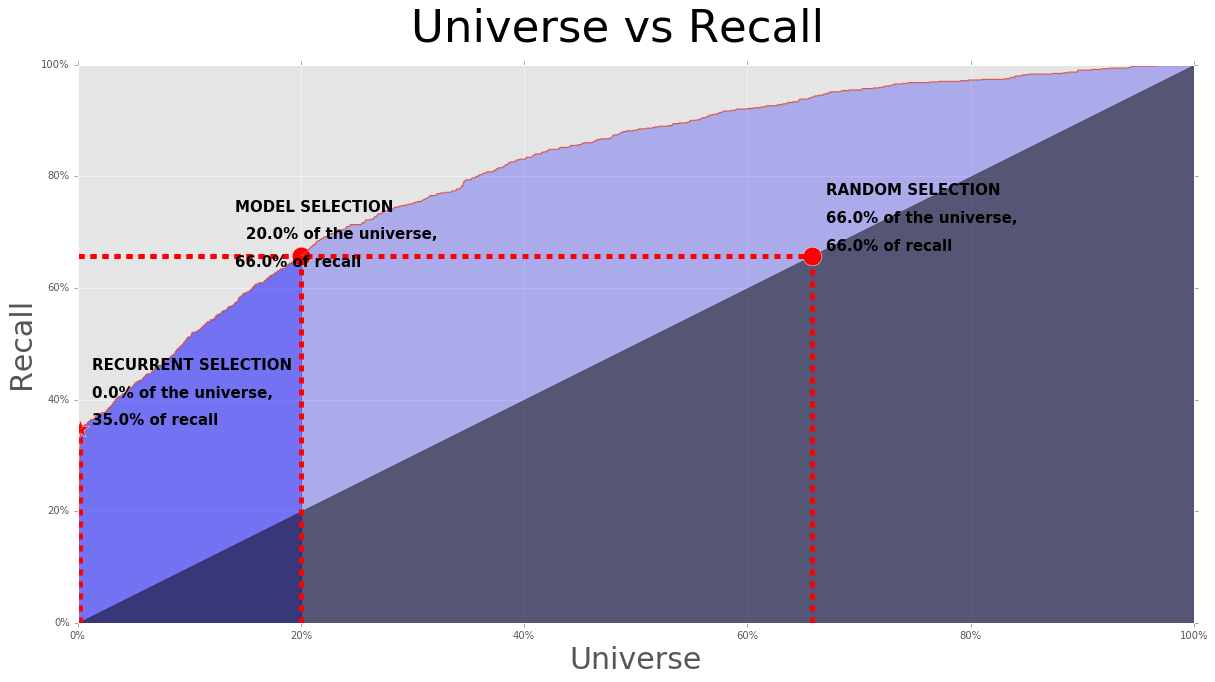

In [10]:
myMetrics.plotUniverseRecall()

Show the Universe vs Efectiveness plot and compares the development of the model taking the top 20% universe against recurrents and random selection

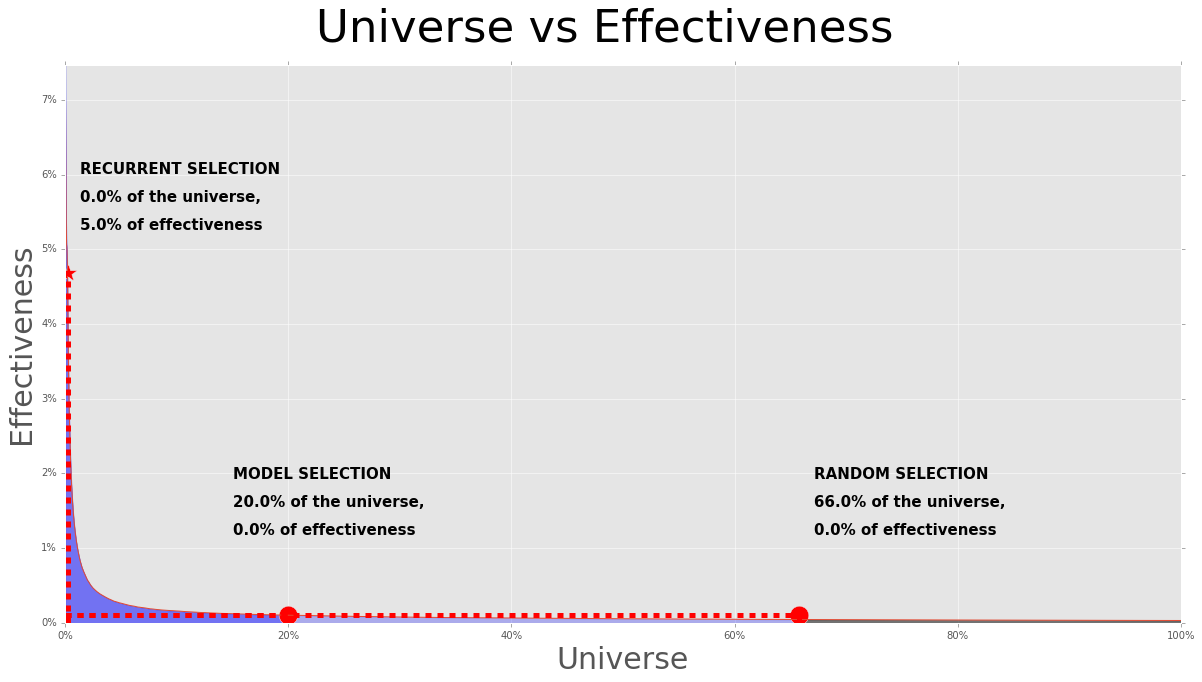

In [11]:
myMetrics.plotUniverseEffectiveness()

Shows the Recall vs Efectiveness plot and compares the development of the model taking the top 20% universe against recurrents and random selection

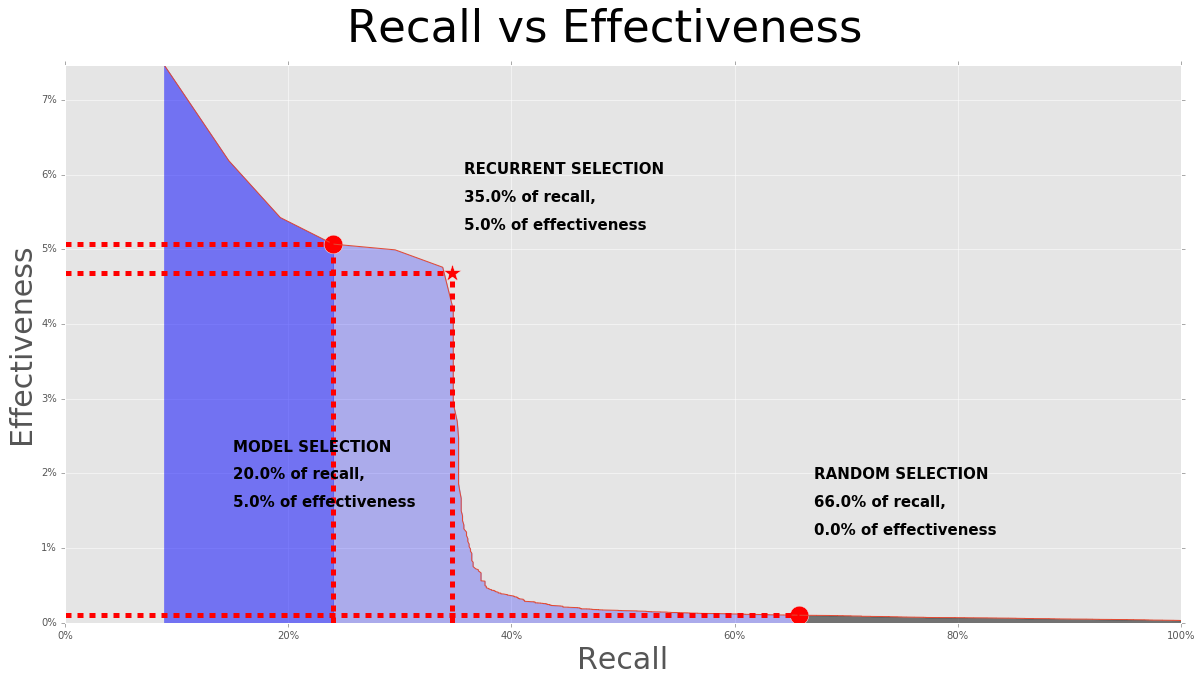

In [12]:
myMetrics.plotRecallEffectiveness()

## Third Module

Once you have the desired results from the execution of the second module, you can run the following code

In [1]:
from pyspark.sql.functions import col as c
from DatioGaranti.PredictionUtils import PredictionUtils

Define the hash value of the prediction data

In [2]:
firstModuleHash = "31282017075f540c304c047a85cce12d172d84934c691c419cf5b83a8144ca884cda119b"
secondModuleHash = "d23d277c9eaa75f1353f6f7dff580fe4584602041e3e7e0cf7985ec5bdd613ec"

Initialize an instance of PredictionUtils in order to get the tables with the prediction data

In [3]:
myPrediction = PredictionUtils(sqlContext, firstModuleHash, secondModuleHash)

Get a list containing the probability of a customer to go back to the commerce

In [4]:
myPrediction.getCustomerList(50)

customer_id  prediction  recurrent execution_date
0     00304948    0.987383        1.0     2018-01-09
1     23948697    0.984486        1.0     2018-01-09
2     19814003    0.982853        1.0     2018-01-09
3     18166773    0.979054        1.0     2018-01-09
4     20461078    0.978275        1.0     2018-01-09
5     49385412    0.978137        1.0     2018-01-09
6     18286618    0.976781        1.0     2018-01-09
7     34890362    0.975986        1.0     2018-01-09
8     15963374    0.975821        1.0     2018-01-09
9     18737103    0.975817        1.0     2018-01-09
10    19690445    0.975645        1.0     2018-01-09
11    24016402    0.975367        1.0     2018-01-09
12    17804922    0.974376        1.0     2018-01-09
13    17173947    0.974324        1.0     2018-01-09
14    11906674    0.974294        1.0     2018-01-09
15    18747098    0.973994        1.0     2018-01-09
16    22395651    0.973354        1.0     2018-01-09
17    18309032    0.973032        1.0     2018-01-09
18    36115819    0.972718        1.0     2018-01-09
19    15407641    0.972697        1.0     2018-01-09
20    31447365    0.972459        1.0     2018-01-09
21    89942439    0.972459        1.0     2018-01-09
22    25450047    0.971901        1.0     2018-01-09
23    77211019    0.971625        1.0     2018-01-09
24    19058196    0.971491        1.0     2018-01-09
25    18264317    0.971479        1.0     2018-01-09
26    17715077    0.971327        1.0     2018-01-09
27    18313911    0.971246        1.0     2018-01-09
28    13000573    0.971231        1.0     2018-01-09
29    22285911    0.970934        1.0     2018-01-09
30    37261863    0.970897        1.0     2018-01-09
31    18536392    0.969305        1.0     2018-01-09
32    00611484    0.969246        1.0     2018-01-09
33    24432364    0.968134        1.0     2018-01-09
34    51405998    0.968108        1.0     2018-01-09
35    17431450    0.967987        1.0     2018-01-09
36    59100425    0.967788        1.0     2018-01-09
37    10205264    0.967642        1.0     2018-01-09
38    15116618    0.967632        1.0     2018-01-09
39    78596231    0.967611        1.0     2018-01-09
40    19171879    0.967563        1.0     2018-01-09
41    21070764    0.967523        1.0     2018-01-09
42    10233850    0.967409        1.0     2018-01-09
43    18796438    0.967022        1.0     2018-01-09
44    63184866    0.966795        1.0     2018-01-09
45    17120184    0.966172        1.0     2018-01-09
46    13340621    0.966025        1.0     2018-01-09
47    21884091    0.965651        1.0     2018-01-09
48    18796544    0.965079        1.0     2018-01-09
49    18080336    0.965022        1.0     2018-01-09

Exports the prediction by customer list into a CSV file

In [5]:
myPrediction.savePredictionAsCSV('list_test')

'Customer list saved as: list_test.csv'